#ECSE 415 Assignment 1
###Liang Zhao   260781081

In [105]:
# all libraries are defined here
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import copy
import math

## 1. Thresholding

###1.1 Simple and Inverse Thresholdings

In [107]:
def threshold(image_path, THRESH):
    # convert to grayscale
    img_gray = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY)
    img_thresh = copy.copy(img_gray)
    img_inverse = copy.copy(img_gray)

    height, width = img_gray.shape
    # thresholds the image
    for i in range(height):
      for j in range(width):
        if img_gray[i,j] > THRESH:
         img_thresh[i,j] = 255
        else:
         img_thresh[i,j] = 0
   
    #inverse thresholding
    for i in range(height):
      for j in range(width):
        if img_gray[i,j] > THRESH:
         img_inverse[i,j] = 0
        else:
         img_inverse[i,j] = 255

    # display images
    plt.subplot(131), plt.imshow(img_gray, cmap="gray")
    plt.title("Grayscale"), plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(img_thresh, cmap="gray")
    plt.title("Thresholded"), plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(img_inverse, cmap="gray")
    plt.title("Inversely thresholded"), plt.xticks([]), plt.yticks([])
    plt.show()

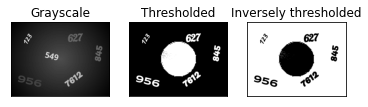

In [108]:
threshold("./numbers.jpg", 55);

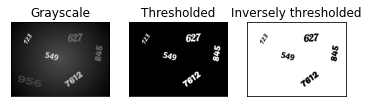

In [ ]:
threshold("./numbers.jpg", 90);

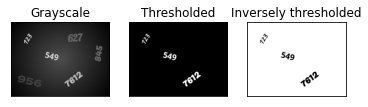

In [ ]:
threshold("./numbers.jpg", 150);

####1.1.1 Obervations and Reasoning

#####a. Numbers in the foreground
- ###### Threshold = 55 (5 numbers)
123, 956, 7612, 627, 845
- ###### Threshold = 90 (5 numbers)
123, 549, 7612, 627, 845
- ###### Threshold = 150 (3 numbers)
123, 549, 7612


#####b. Observations 
- As threshold increases, observed numbers gets thinner. 
- As thrashold increases, numbers with darker color disapperared.
- For threshold is around to 55, there is a big white dot at center of image and this white dot will be removed when threshold increased. 

###1.2 Window binary thresholding

In [299]:
def window_threshold(image_path, THRESH1, THRESH2):
    # convert to grayscale
    img_gray = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY)
    img_thresh = copy.copy(img_gray)

    height, width = img_gray.shape
    # window thresholds the image
    for i in range(0,height):
      for j in range(0,width):
        if img_gray[i,j] > THRESH1 and img_gray[i, j] < THRESH2:
         img_thresh[i,j] = 255
        else:
         img_thresh[i,j] = 0

    # display images
    plt.subplot(121), plt.imshow(img_gray, cmap="gray")
    plt.title("Grayscale"), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(img_thresh, cmap="gray")
    plt.title("Window thresholded"), plt.xticks([]), plt.yticks([])
    plt.show()

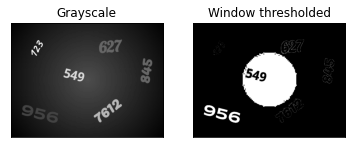

In [300]:
window_threshold("./numbers.jpg", 55, 90);

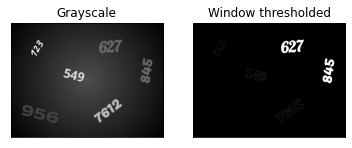

In [301]:
window_threshold("./numbers.jpg", 90, 150);

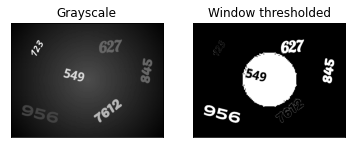

In [302]:
window_threshold("./numbers.jpg", 55, 150);

####1.2.1 Obervation and Reasoning

#####a. Numbers in the foreground
- ###### Threshold = 55 - 90 (2 numbers)
549, 956
- ###### Threshold = 90 - 150 (2 numbers)
627, 845
- ###### Threshold = 55 - 150 (4 numbers)
956, 549, 627, 845

#####b. Observations 
- The white dot is dertermined by the lower bound of the thresholds
- White numbers 123, 7612 are not shown in neither cases, so probably it is the lower bound which dertermines white numbers
- Dark numbers appear when the range of threshold is large

###1.3 Thresholds for **123** and **549**

We can use binary search to narrow the search of finding our desired hyper-parameter value 

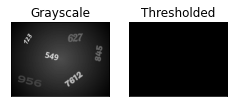

In [ ]:
threshold("./numbers.jpg", 255)

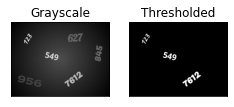

In [ ]:
threshold("./numbers.jpg", 127)

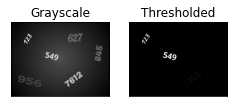

In [ ]:
threshold("./numbers.jpg", 191)

##2. Denoising

Defined filter function

In [ ]:
def filter(image_path, origin_path, filter_func):
    
    # To display we need to convert from BGR to RGB(GRAY)
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY)
    origin = cv2.cvtColor(cv2.imread(origin_path), cv2.COLOR_BGR2GRAY)
    
    # to use cv2 built in filter here
    result = filter_func(img)
    print("PSNR = " + str(cv2.PSNR(origin, result)))

    # plot
    plt.subplot(121), plt.imshow(img, cmap="gray")
    plt.title("Original"), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(result, cmap="gray")
    plt.title("Blur filter"), plt.xticks([]), plt.yticks([])
    plt.show()

###2.1 Gaussion_lighthouse

####2.1.1 5x5 Gaussion Filter

PSNR = 26.740281647948976


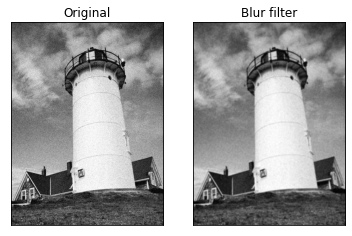

In [297]:
filter('./gaussian_lighthouse.png', './lighthouse.png', lambda u: cv2.GaussianBlur(u, (5, 5), math.sqrt(2)))

####2.1.2 Box filter

PSNR = 25.300013564257455


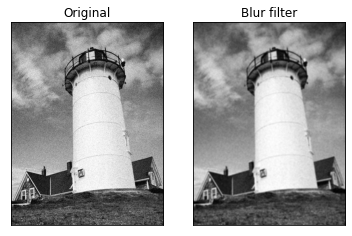

In [298]:
filter('./gaussian_lighthouse.png', './lighthouse.png', lambda u: cv2.blur(u, (5, 5)))

####2.1.3 Compare PSNR
- Gaussian: PSNR = 26.740281647948976
- Box Filter: PSNR = 25.300013564257455
#### Conclusion
1. Gaussian filter: it outputs a 'weighted average' of each pixel's neighborhood; Therefore, the average weights are more towards the value of the central pixels.
2. Box filter: it has a uniformly weighted average.<br><br>
Therefore, Gaussian provides preserves edges better and usually provide gentler smoothing than box filter becuase it weighted the center pixel more than outside pixels. 

###2.2 Salt and Pepper lighthouse

####2.2.1 Gaussion for salt and pepper

PSNR = 26.30020233930108


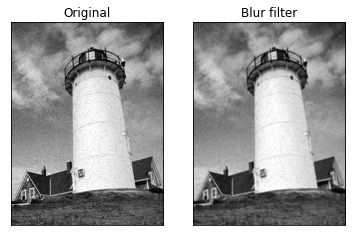

In [ ]:
filter('./saltandpepper_lighthouse.png', './lighthouse.png', lambda u: cv2.GaussianBlur(u, (5, 5), math.sqrt(2)))

####2.2.2 Median filter for salt and pepper

PSNR = 26.809189025548324


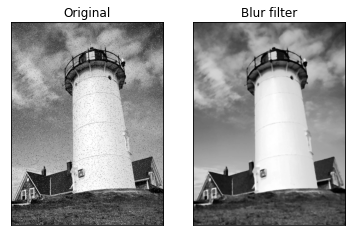

In [ ]:
filter('./saltandpepper_lighthouse.png', './lighthouse.png', lambda u: cv2.medianBlur(u, 5))

####2.2.3 Compare PSNR

Gaussion filter: PSNR = 26.30020233930108<br>
Median filter: PSNR = 26.809189025548324

#####Conclusion:
In salt and pepper images, there are a lot of extrem values(salt and pepper). By using median filter, these extrem values can effectively removed. **Therefore, in this case, median filter gives better result**.

##3. Sobel edge detector

In [47]:
def sobel_func(img_path, k_size, filter_fvt=None, threshold=None):
    
    # load the image to grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if filter_fvt != None:
        img = filter_fvt(img)

    # apply 15x15 Sobel filters to the intensity channel
    I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=k_size)
    I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=k_size)

    # compute sobel Magnitude and Phase
    I_m = cv2.magnitude(I_x, I_y)

    biggest = np.amax(I_m)
    if threshold != None:
      if threshold == 10:
        threshold = biggest * 0.1
      else:
        threshold = biggest * 0.2
      ret, I_m = cv2.threshold(I_m, threshold, 2000, cv2.THRESH_BINARY)

    I_p = cv2.phase(I_x, I_y)

    plt.figure(figsize=(20, 20))
    plt.subplot(121), plt.imshow(I_m, cmap="gray")
    plt.title("I_m"), plt.xticks([]), plt.yticks([])
    plt.show()

###3.1 Sobel with different kernel size

3x3 size

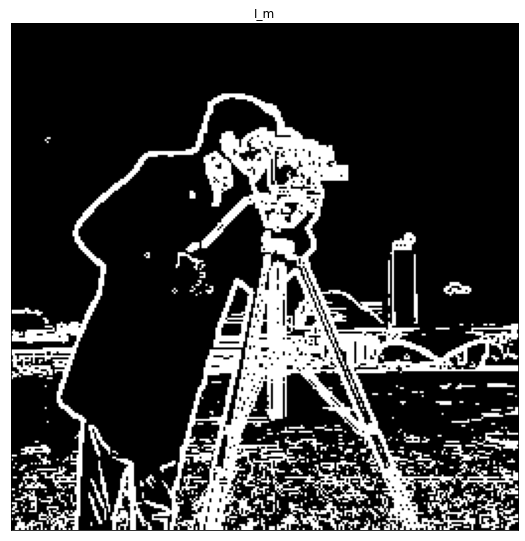

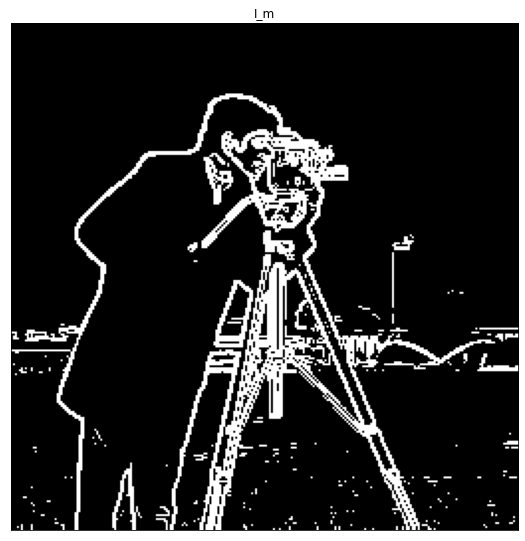

In [46]:
sobel_func('./cameraman.png', 3, threshold=10)
sobel_func('./cameraman.png', 3, threshold=20)

5x5 size

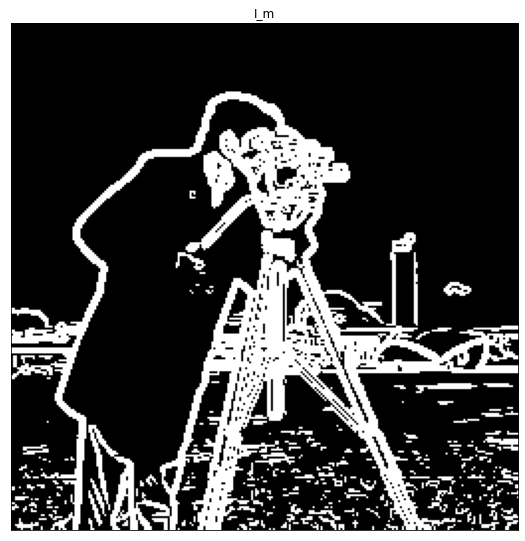

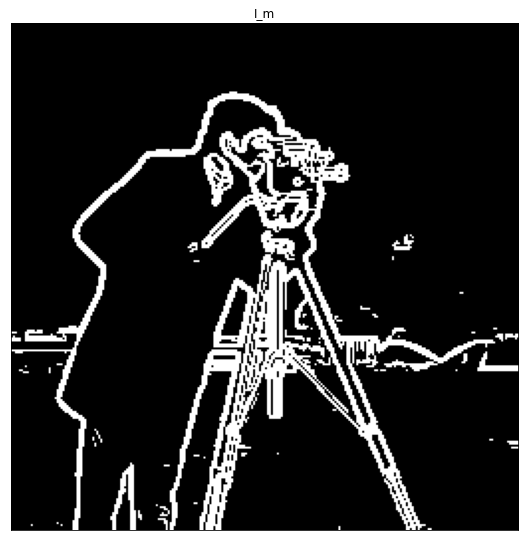

In [ ]:
sobel_func('./cameraman.png', 5, threshold=10)
sobel_func('./cameraman.png', 5, threshold=20)

7x7 size

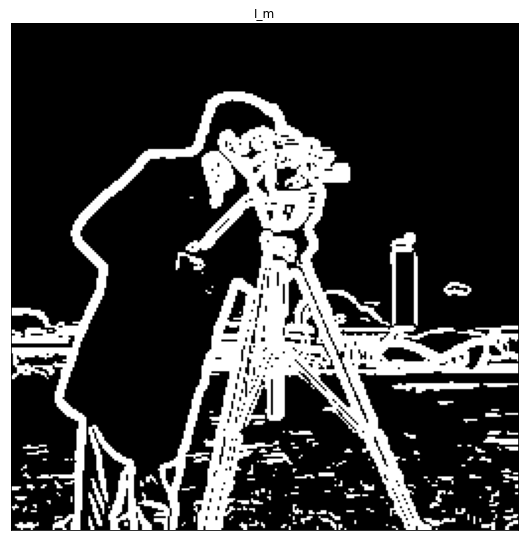

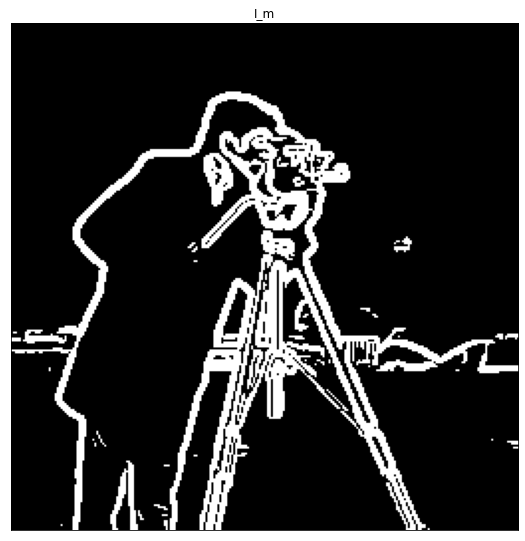

In [ ]:
sobel_func('./cameraman.png', 7, threshold=10)
sobel_func('./cameraman.png', 7, threshold=20)

**Comment:**<br>
As kernel size increase, edges will become more and more blurry. This is because, in larger kernel, more pixels are parts of the convolution process.

###3.2 Sobel with gaussian cameraman

####3.2.1 3x3 Sobel with gaussian cameraman

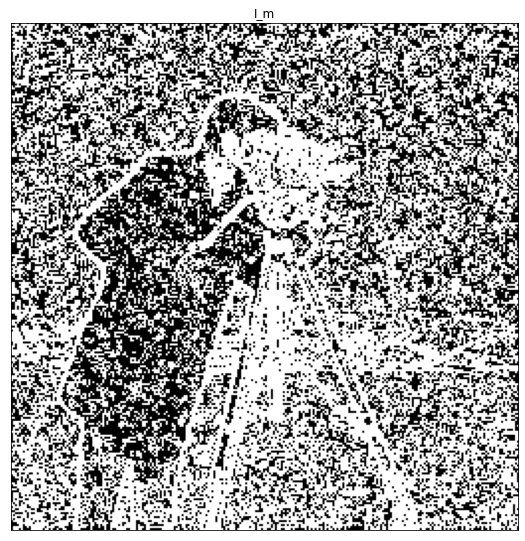

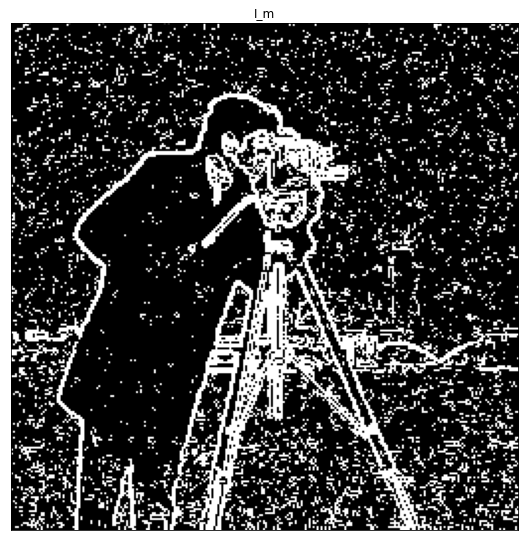

In [ ]:
sobel_func('./gaussian_cameraman.png', 3, threshold=10)
sobel_func('./gaussian_cameraman.png', 3, threshold=20)

####3.2.2 3×3 box filter and Sobel edge detector

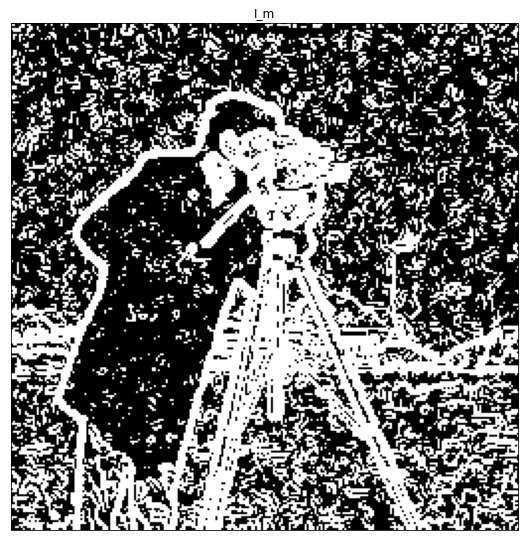

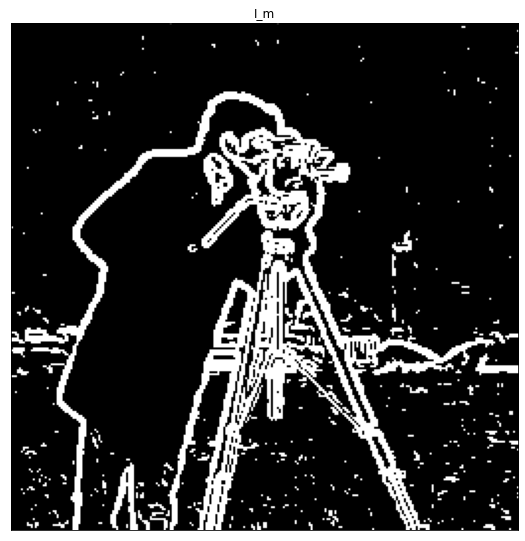

In [ ]:
sobel_func('./gaussian_cameraman.png', 3, filter_fvt=lambda u: cv2.blur(u, (3, 3)), threshold=10)
sobel_func('./gaussian_cameraman.png', 3, filter_fvt=lambda u: cv2.blur(u, (3, 3)), threshold=20)

**Comments**
1. Pre-processing with Box Filter makes less noise edges being detected.
2. This is because Box Filter makes image smoother such that less sudden changes in pixels exists, and sobel derivative cannot detect those smoothed edges.  

##4. Canny Edge Detection

###4.1 4 main steps of Canny edge detection
<pre>
1. Noise reduction: filter image with nabla(Gaussian(0, variance))
2. Gradient Calculation: find magnitude and orientation of gradient
3. Non‐maximum suppression: make edges narrower
4. Hysteresis: Thresholding and linking; if start of edge >= high, start marking edge, if current edge component >=low, continue marking as edge, else stop
</pre>

###4.2 combination of hyper-parameters

In [ ]:
def canny(img_path, k, l, h):
    # load image as grayscaled
    img = cv2.imread(img_path)
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)

    # blur the image, noise reduction
    img = cv2.GaussianBlur(img, (k, k), 0)

    # compute Canny edges
    I_edge = cv2.Canny(img, l, h)

    # display images
    plt.figure(figsize=(20, 20))
    plt.subplot(111), plt.imshow(I_edge, cmap="gray")
    plt.title("I_edge"), plt.xticks([]), plt.yticks([])
    plt.show()

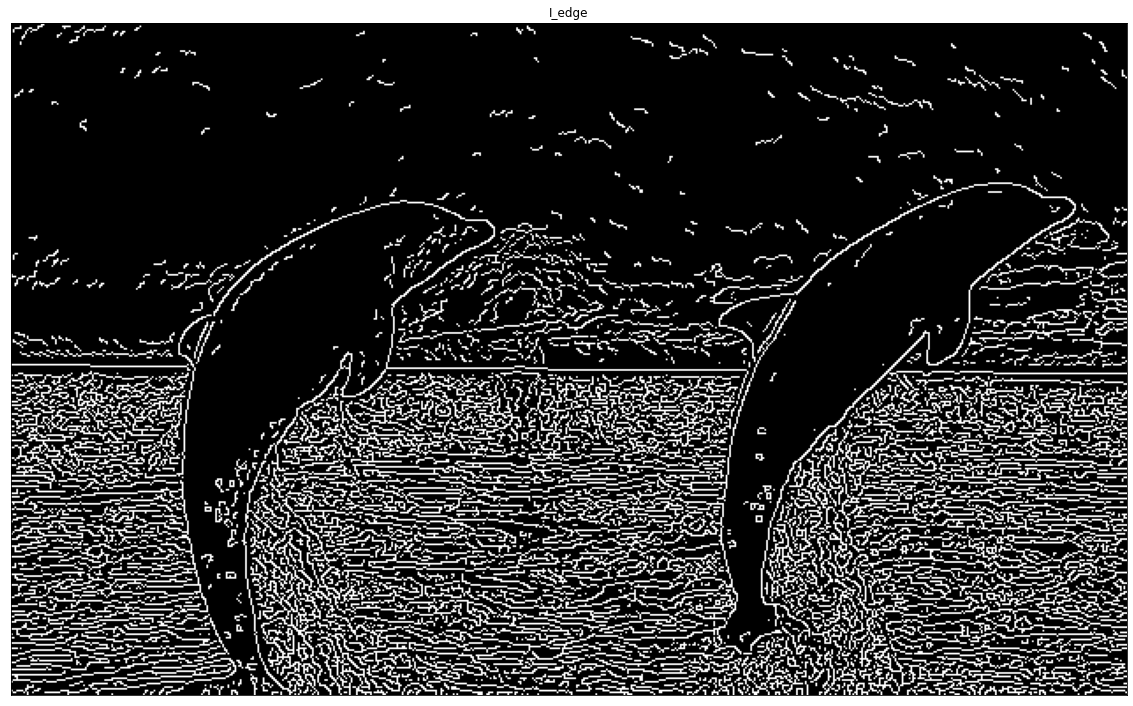

In [ ]:
canny('./dolphin.jpg', 5, 9, 13)

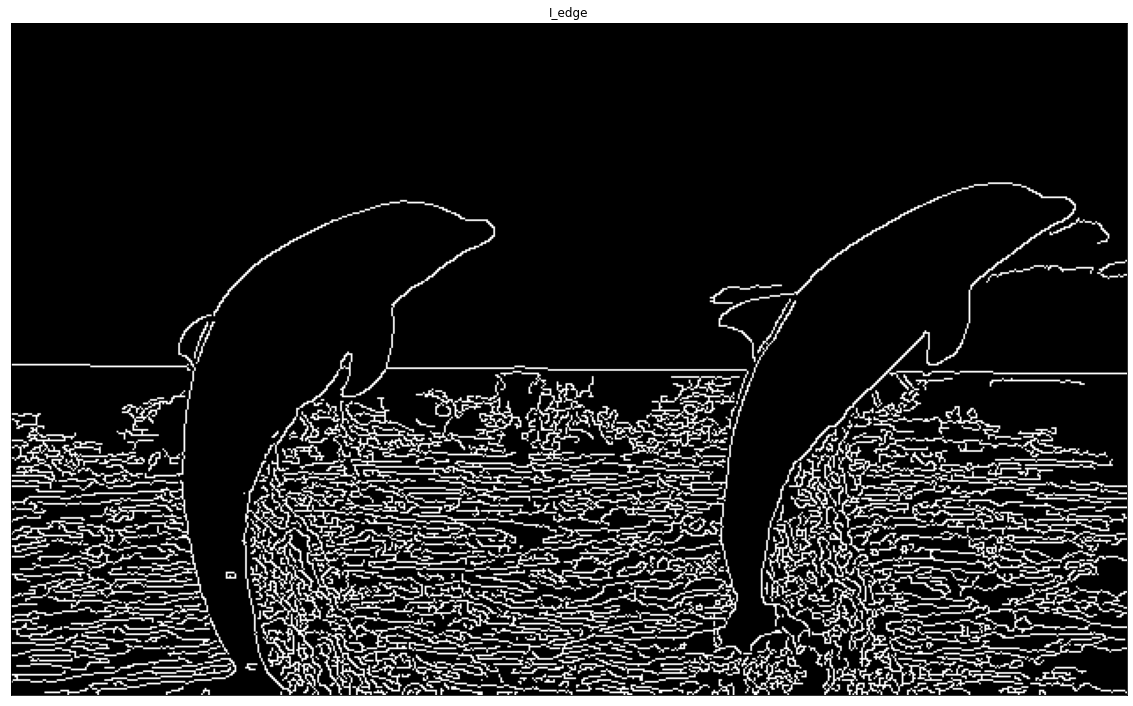

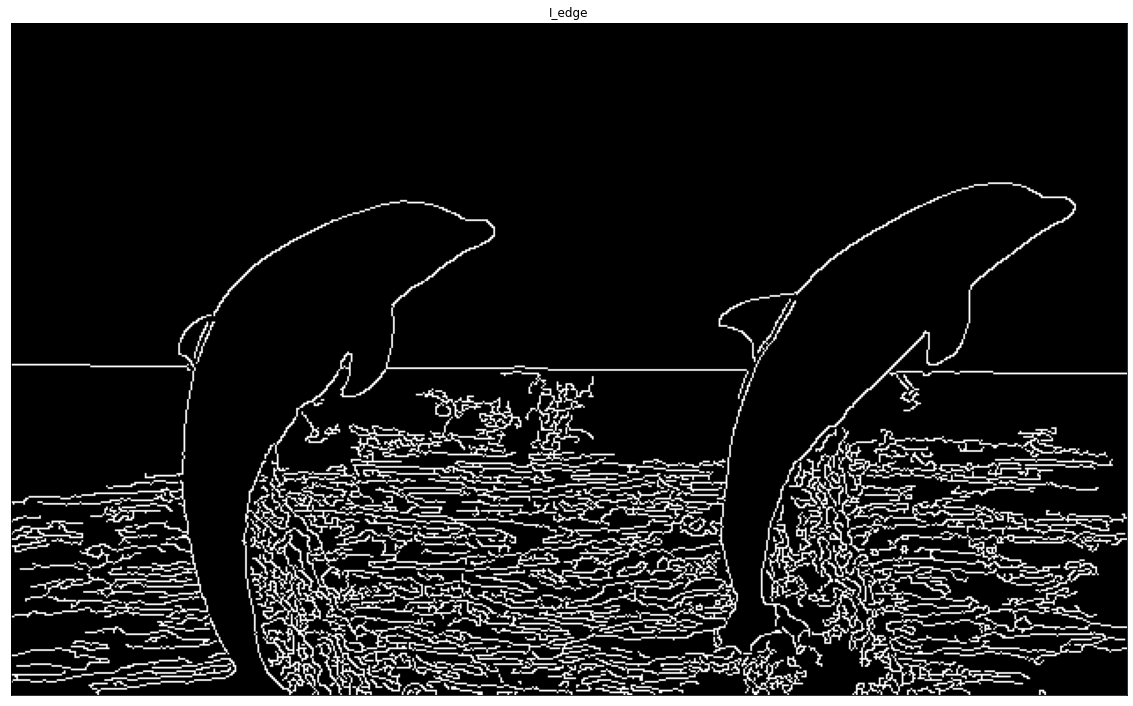

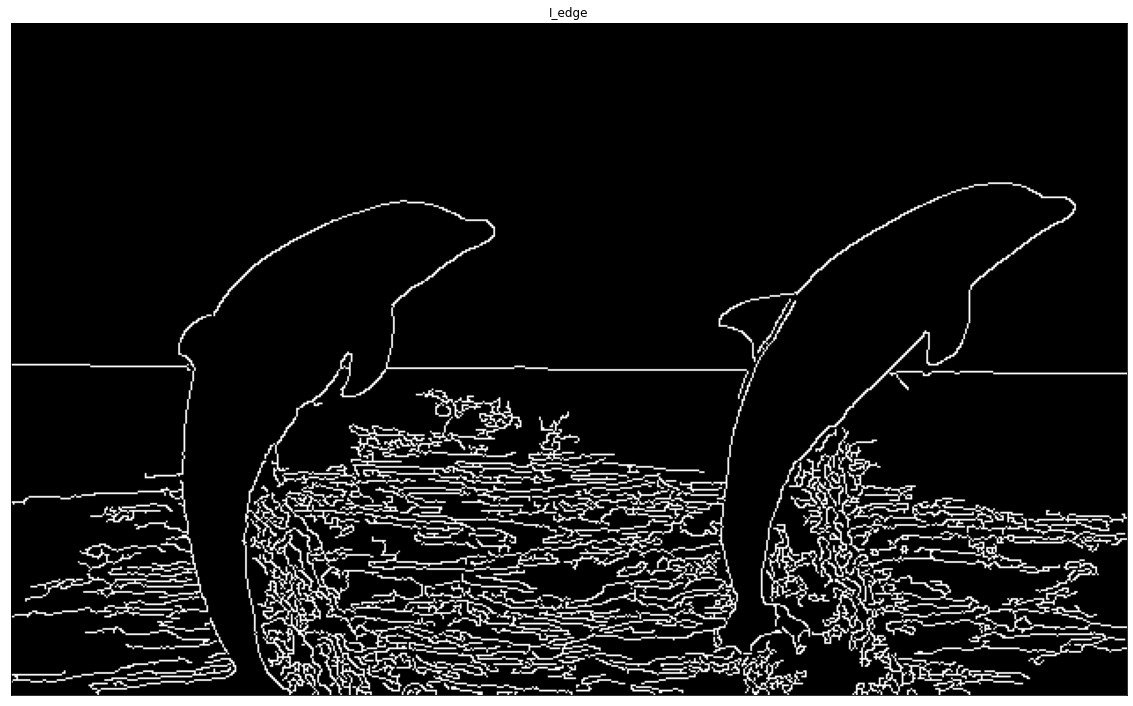

In [ ]:
canny('./dolphin.jpg', 5, 10, 100)
canny('./dolphin.jpg', 5, 10, 150)
canny('./dolphin.jpg', 5, 10, 200)

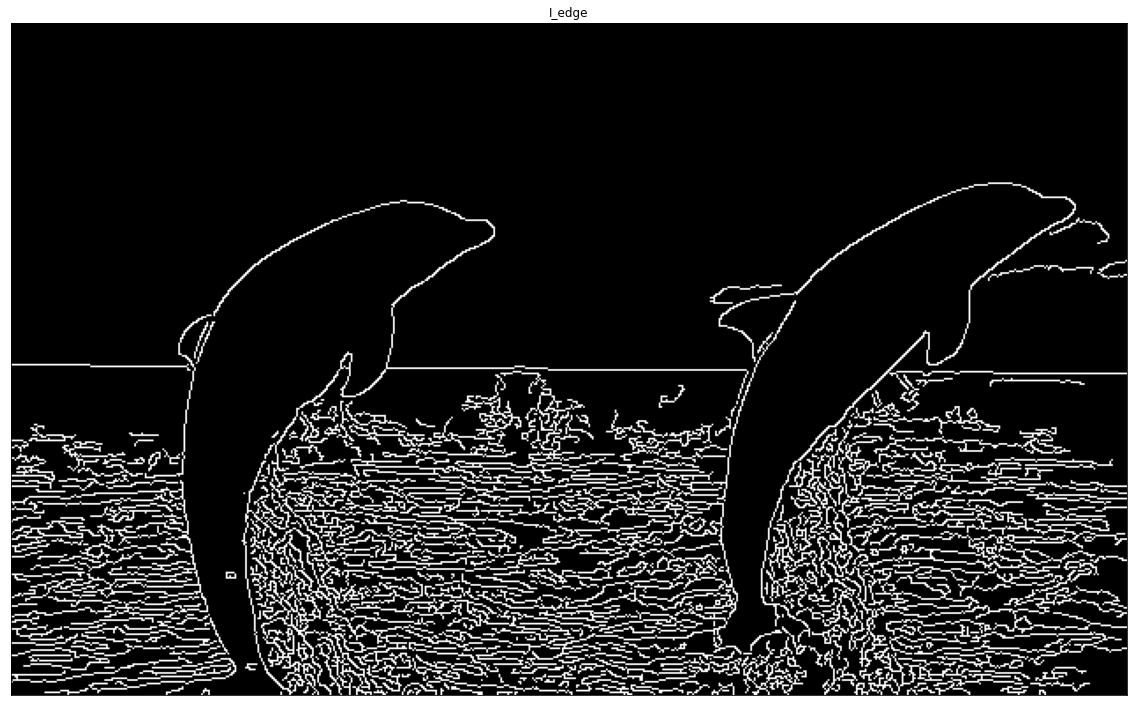

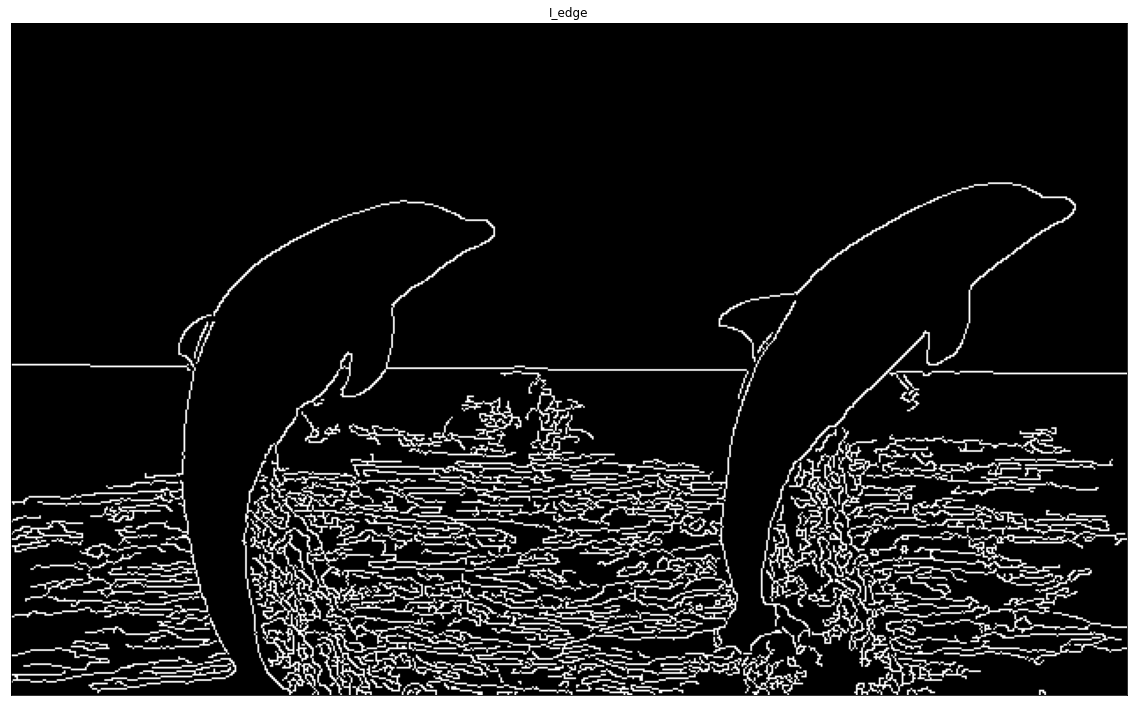

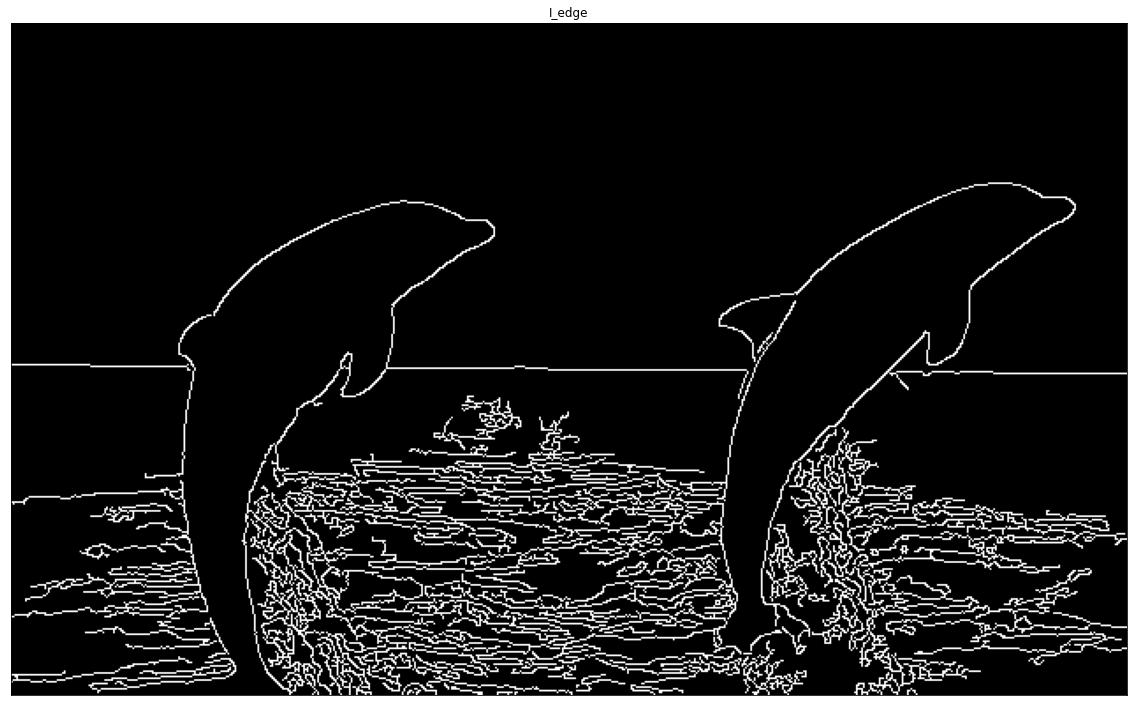

In [ ]:
canny('./dolphin.jpg', 5, 30, 100)
canny('./dolphin.jpg', 5, 30, 150)
canny('./dolphin.jpg', 5, 30, 200)

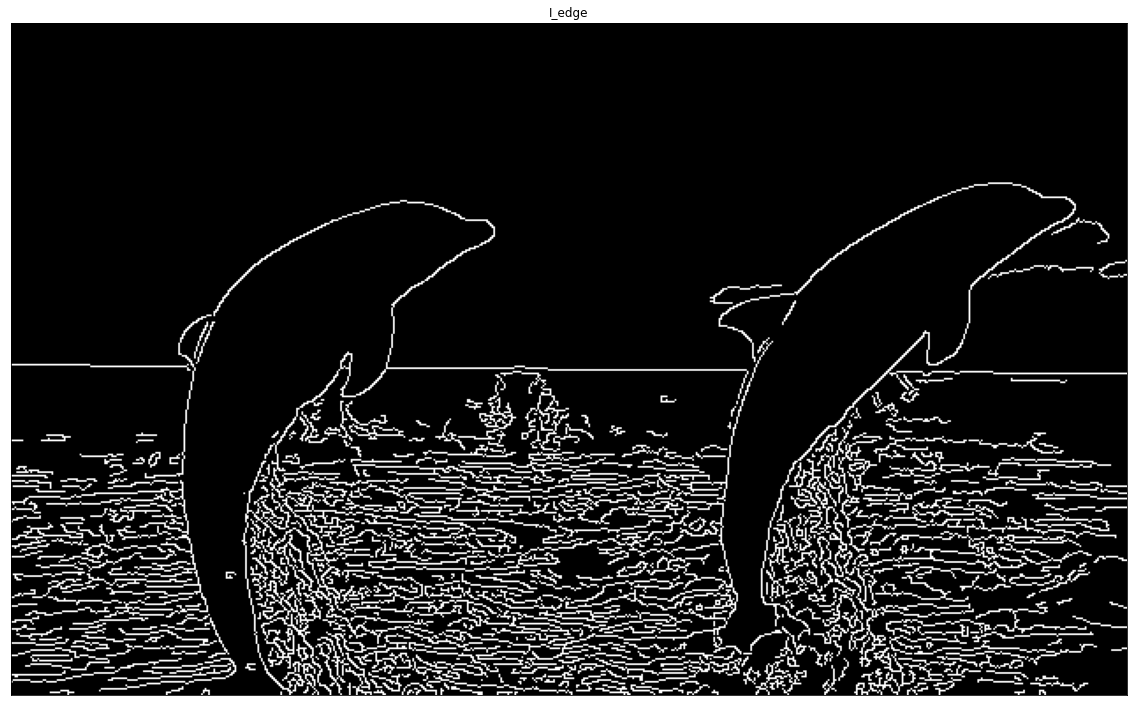

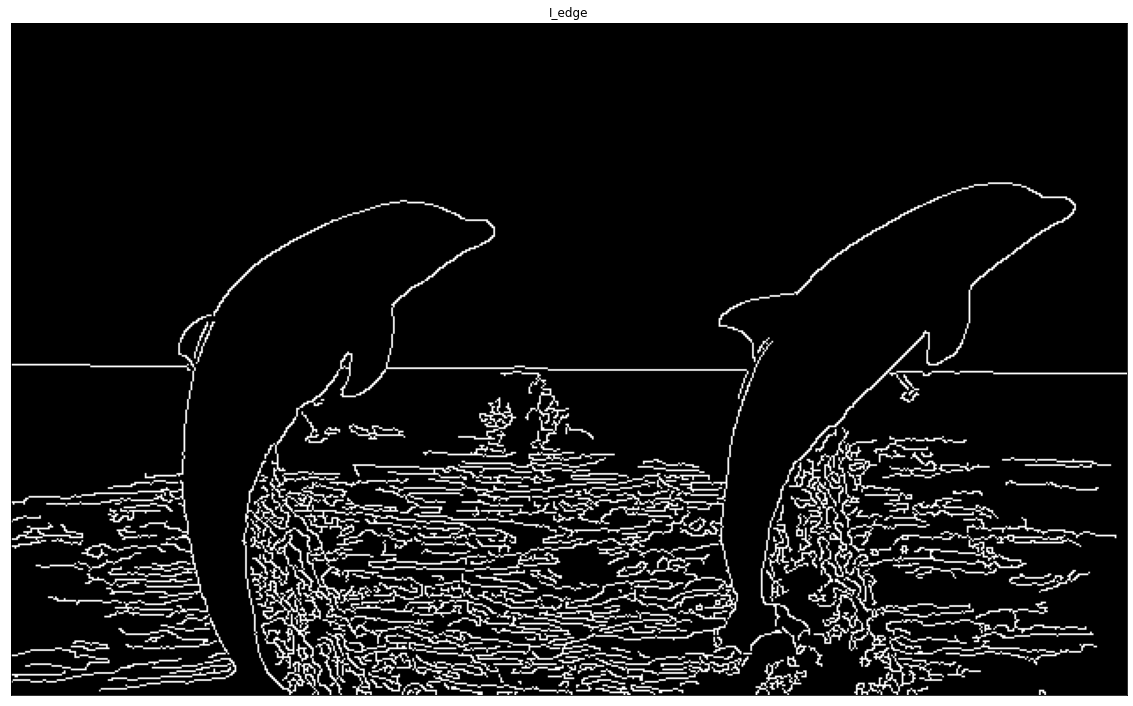

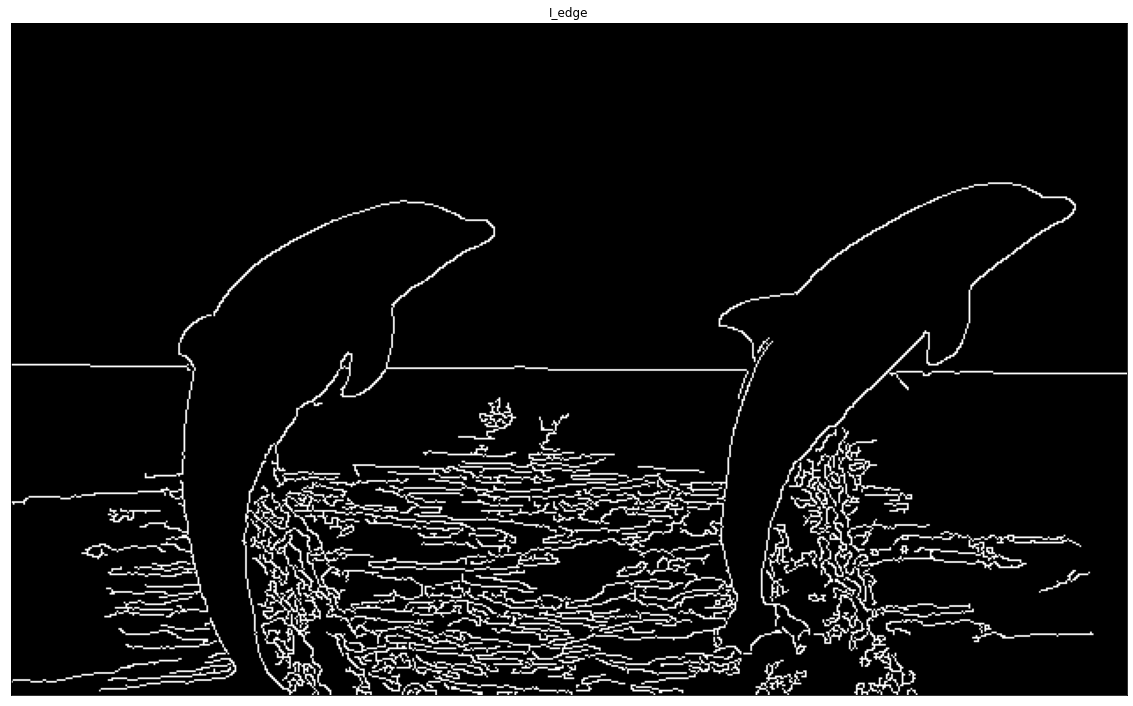

In [ ]:
canny('./dolphin.jpg', 5, 50, 100)
canny('./dolphin.jpg', 5, 50, 150)
canny('./dolphin.jpg', 5, 50, 200)

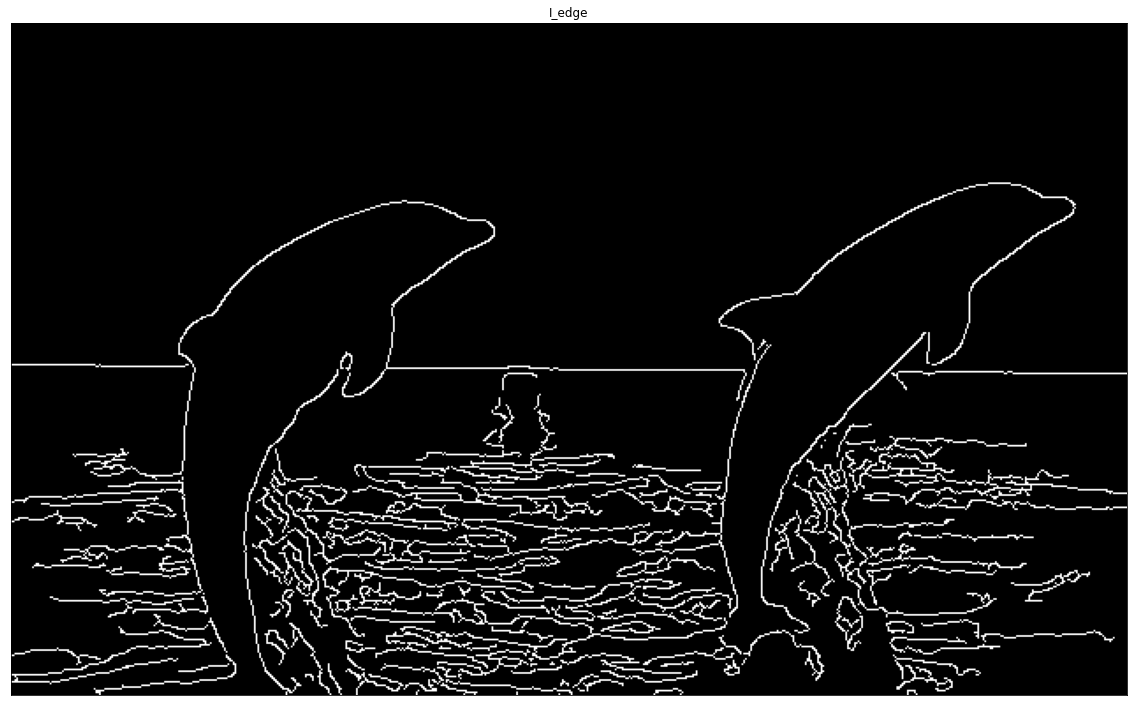

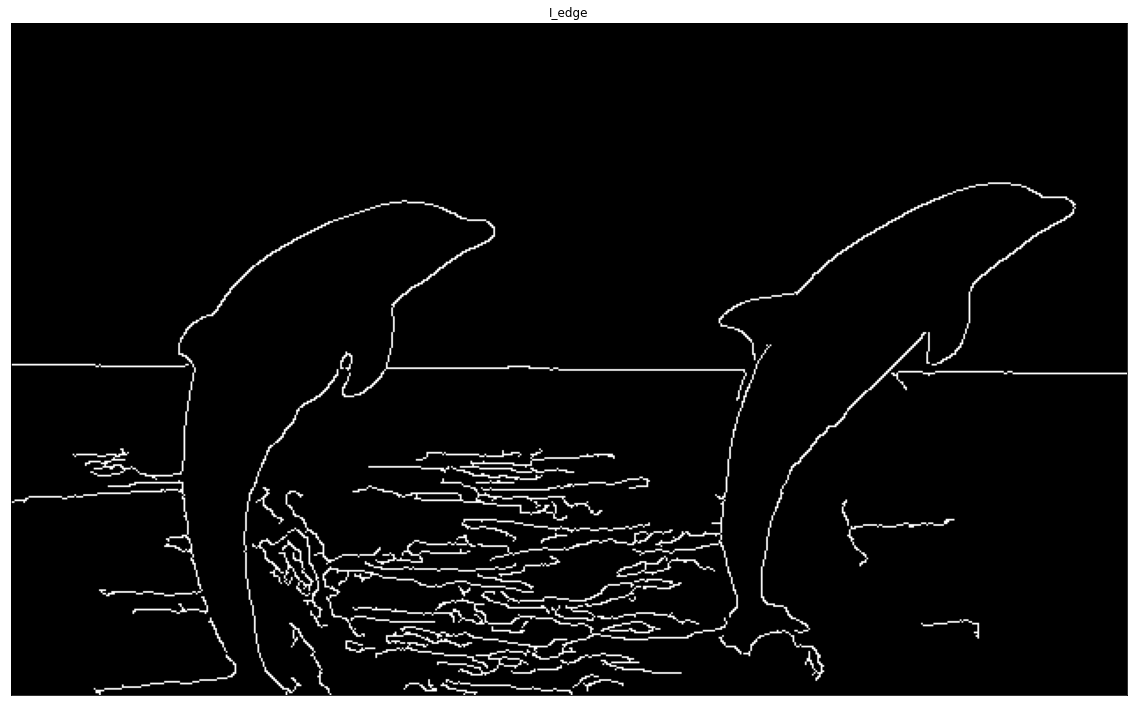

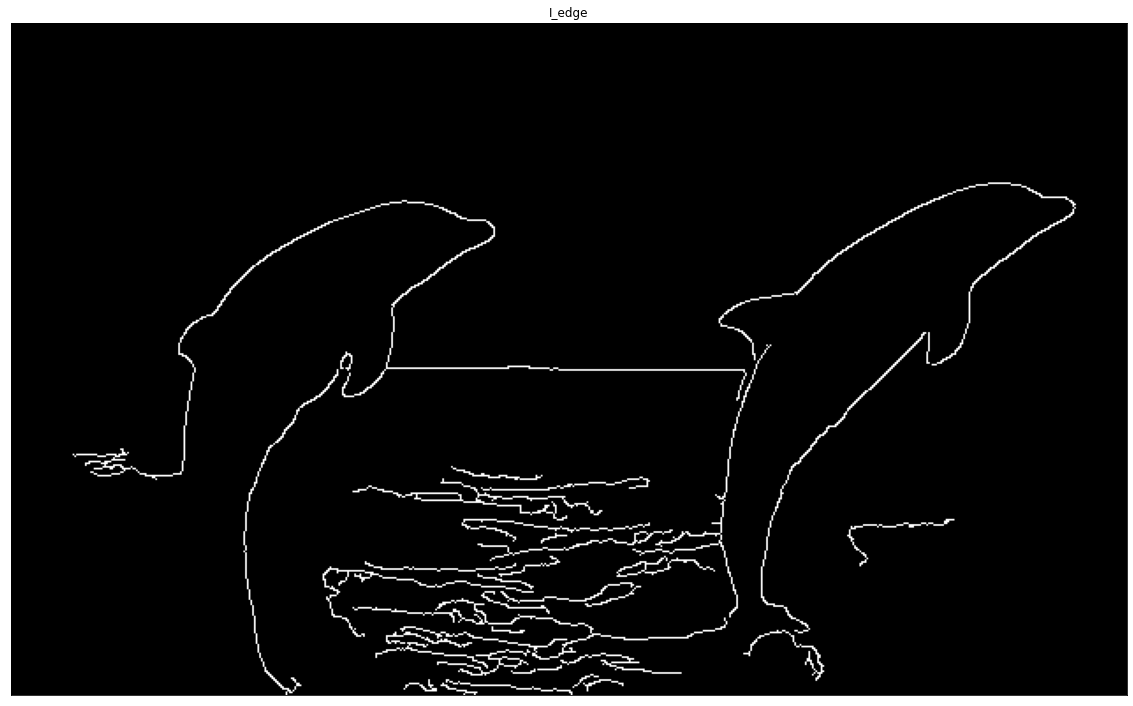

In [ ]:
canny('./dolphin.jpg', 9, 10, 100)
canny('./dolphin.jpg', 9, 10, 150)
canny('./dolphin.jpg', 9, 10, 200)

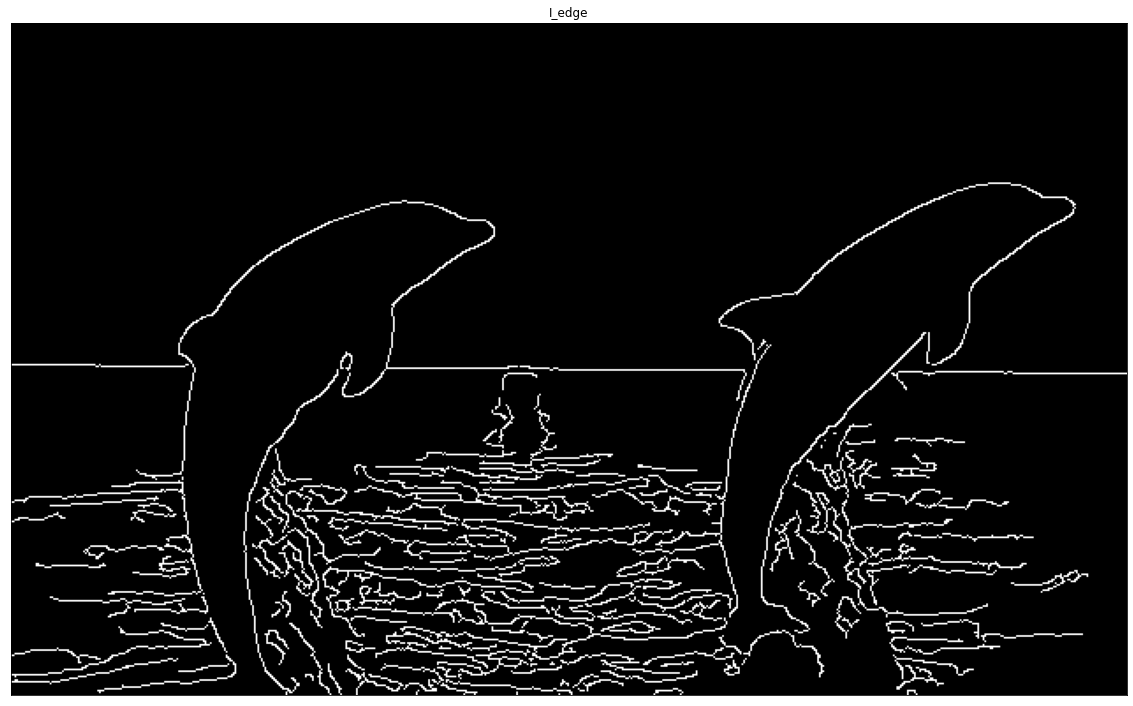

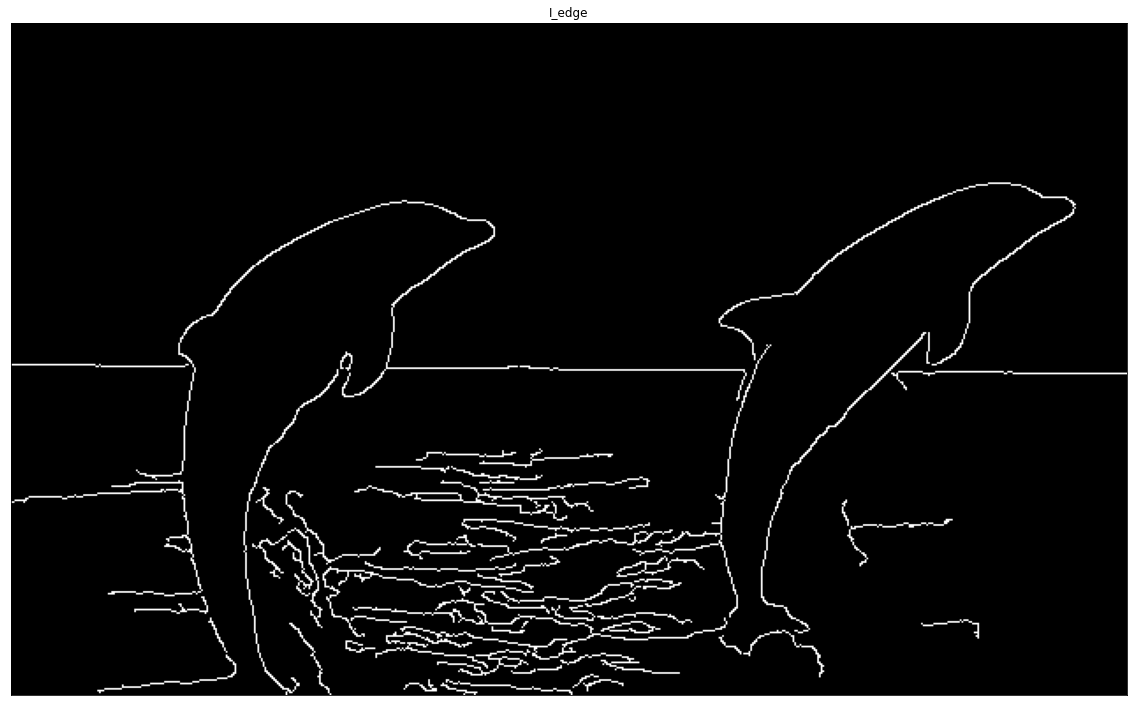

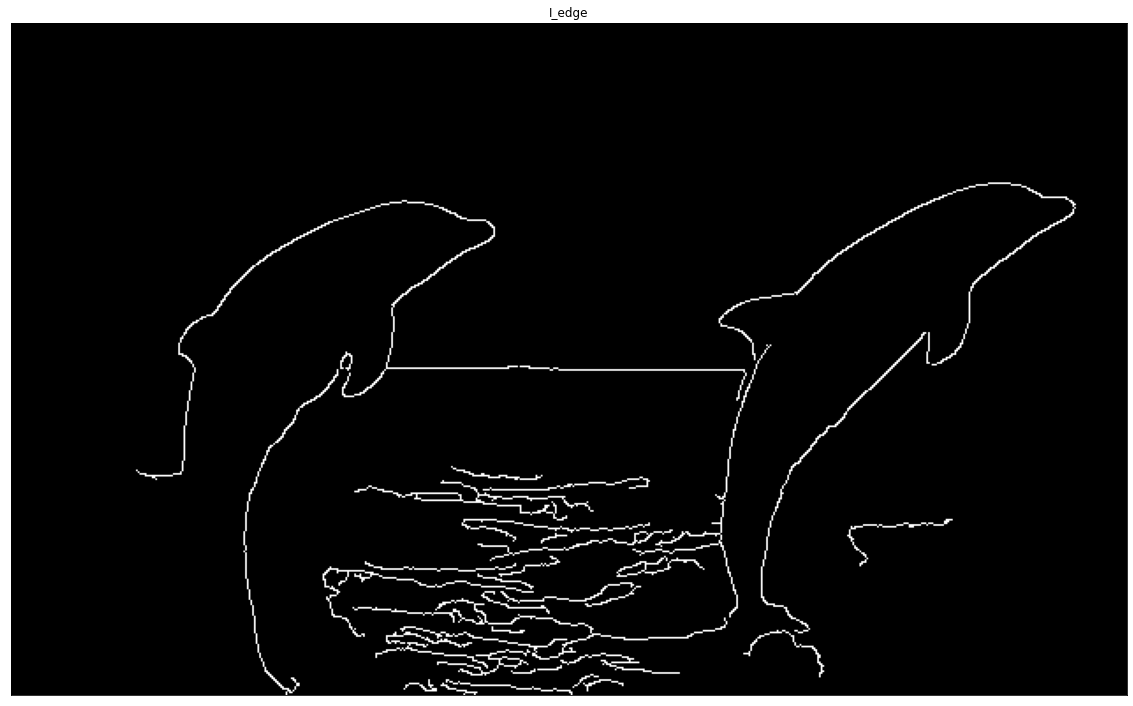

In [ ]:
canny('./dolphin.jpg', 9, 30, 100)
canny('./dolphin.jpg', 9, 30, 150)
canny('./dolphin.jpg', 9, 30, 200)

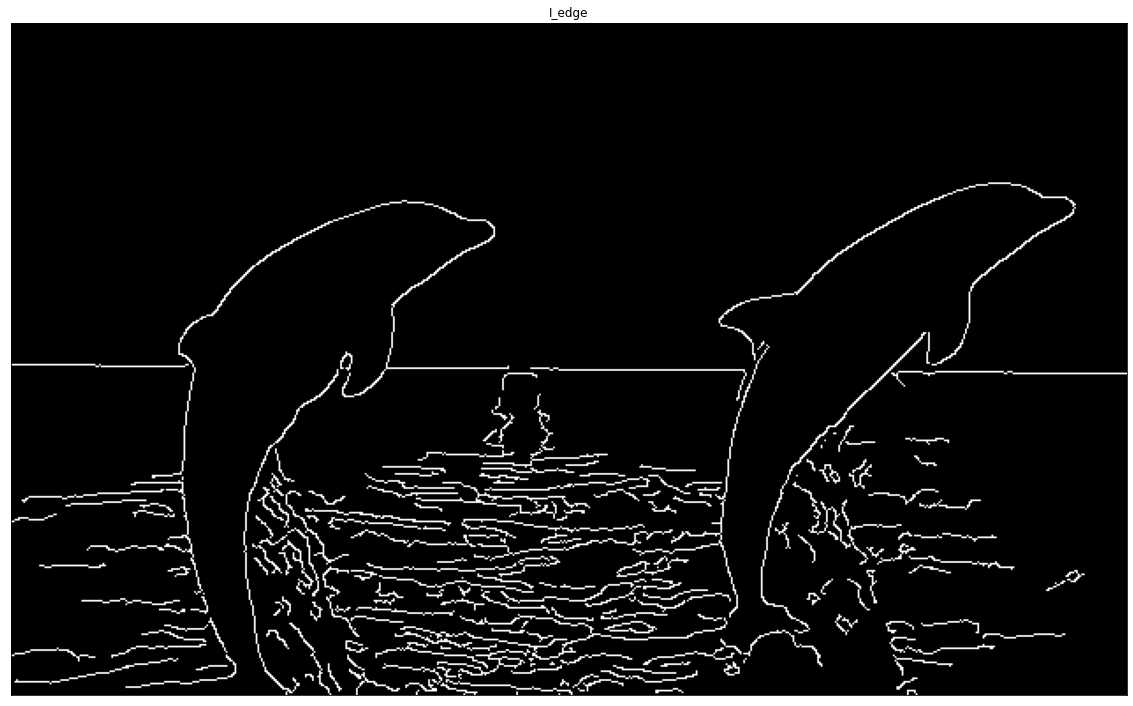

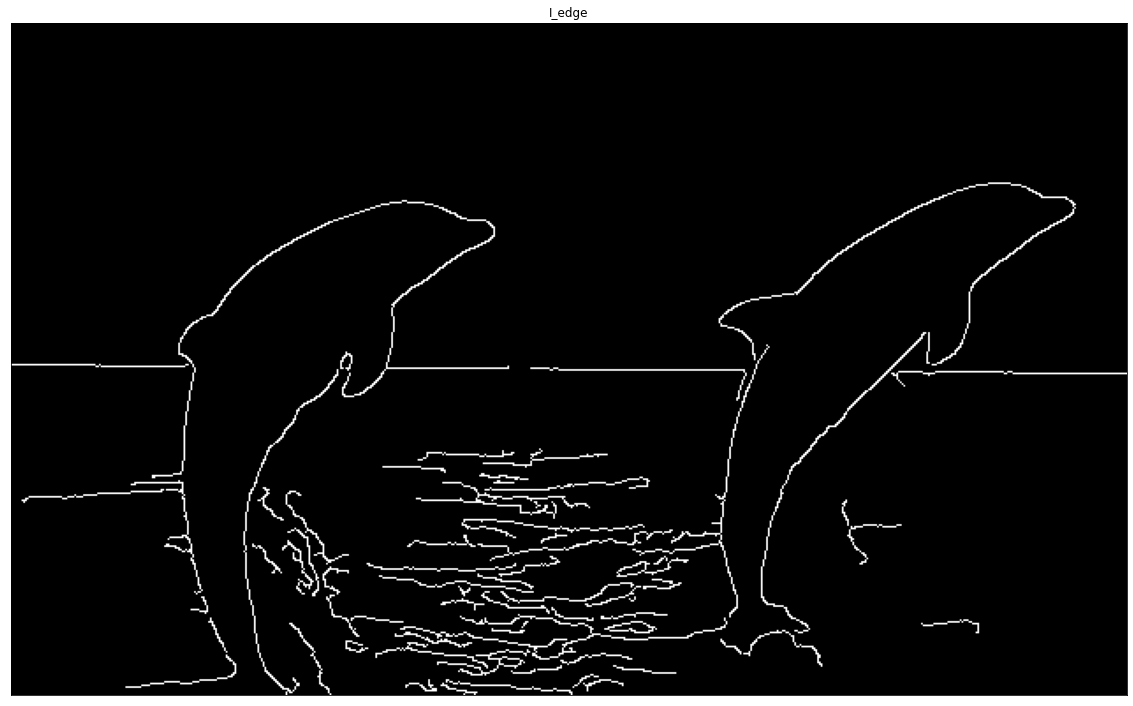

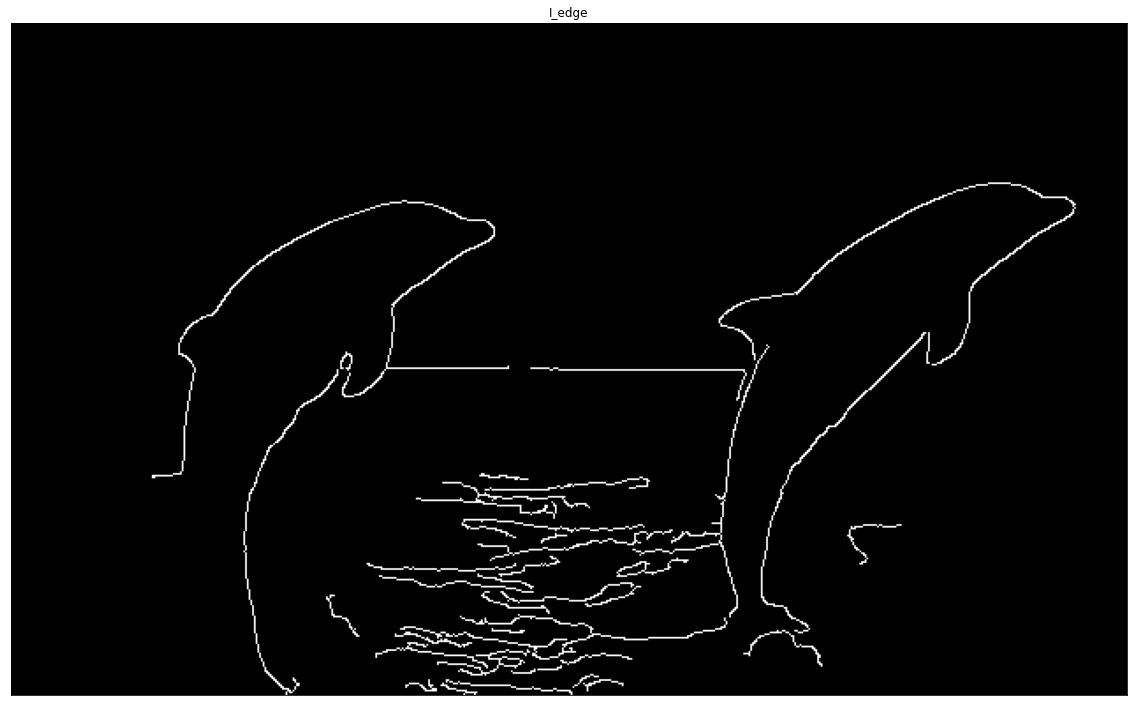

In [ ]:
canny('./dolphin.jpg', 9, 50, 100)
canny('./dolphin.jpg', 9, 50, 150)
canny('./dolphin.jpg', 9, 50, 200)

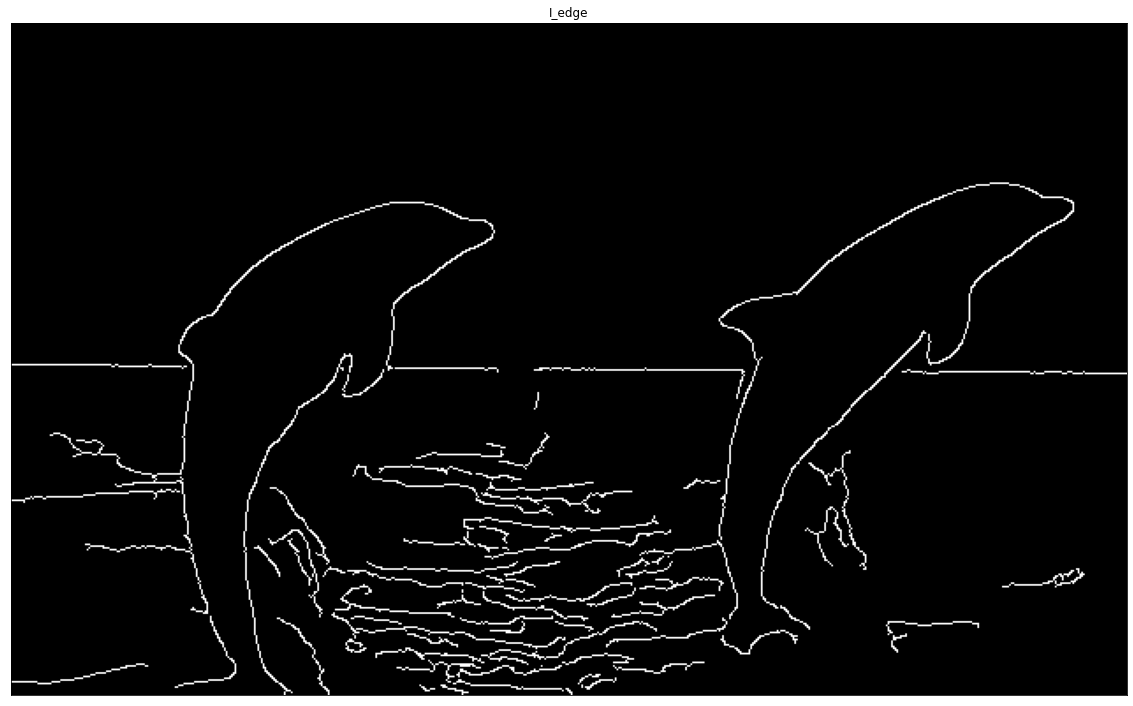

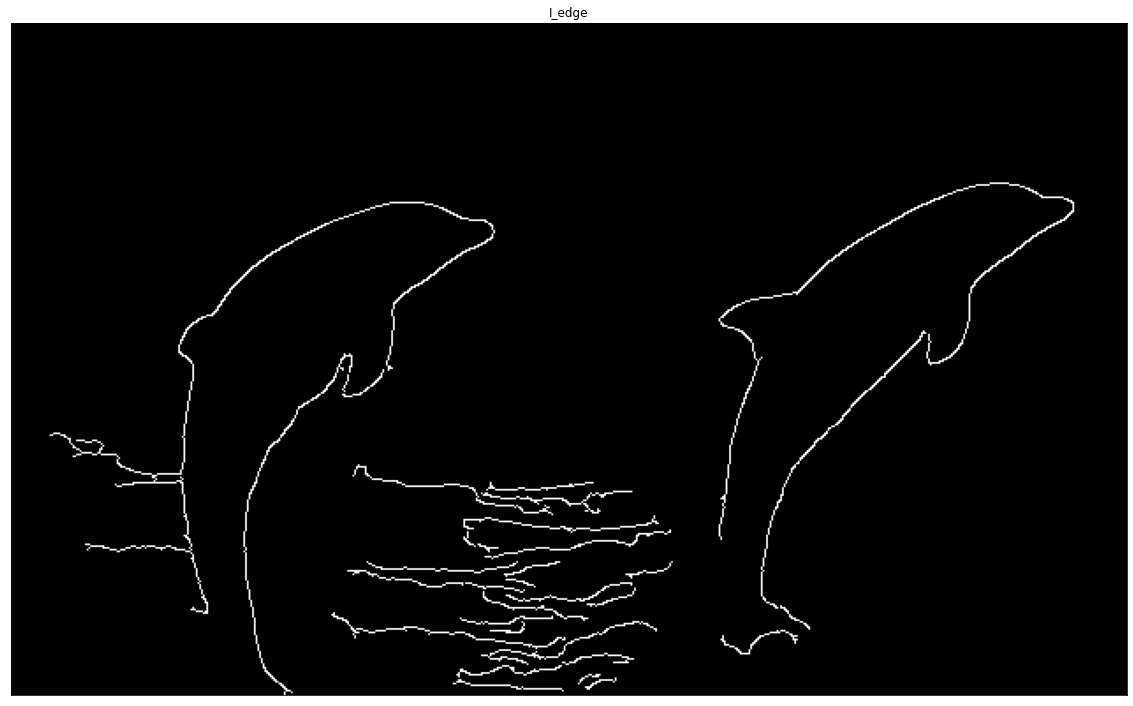

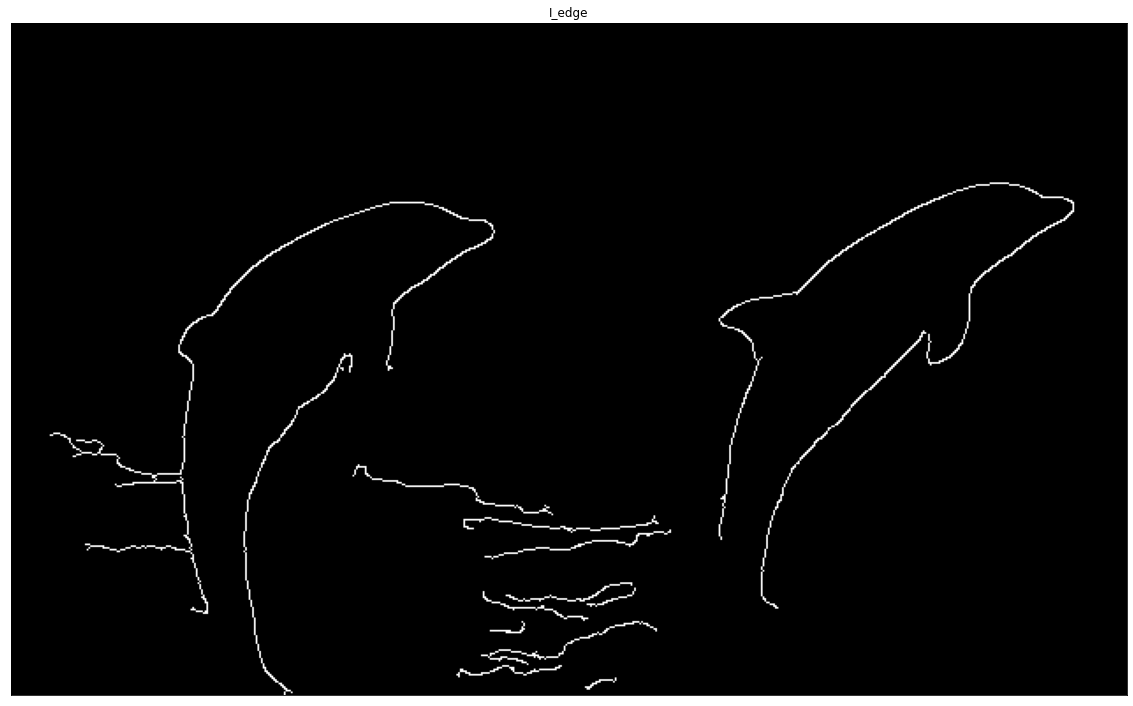

In [ ]:
canny('./dolphin.jpg', 13, 10, 100)
canny('./dolphin.jpg', 13, 10, 150)
canny('./dolphin.jpg', 13, 10, 200)

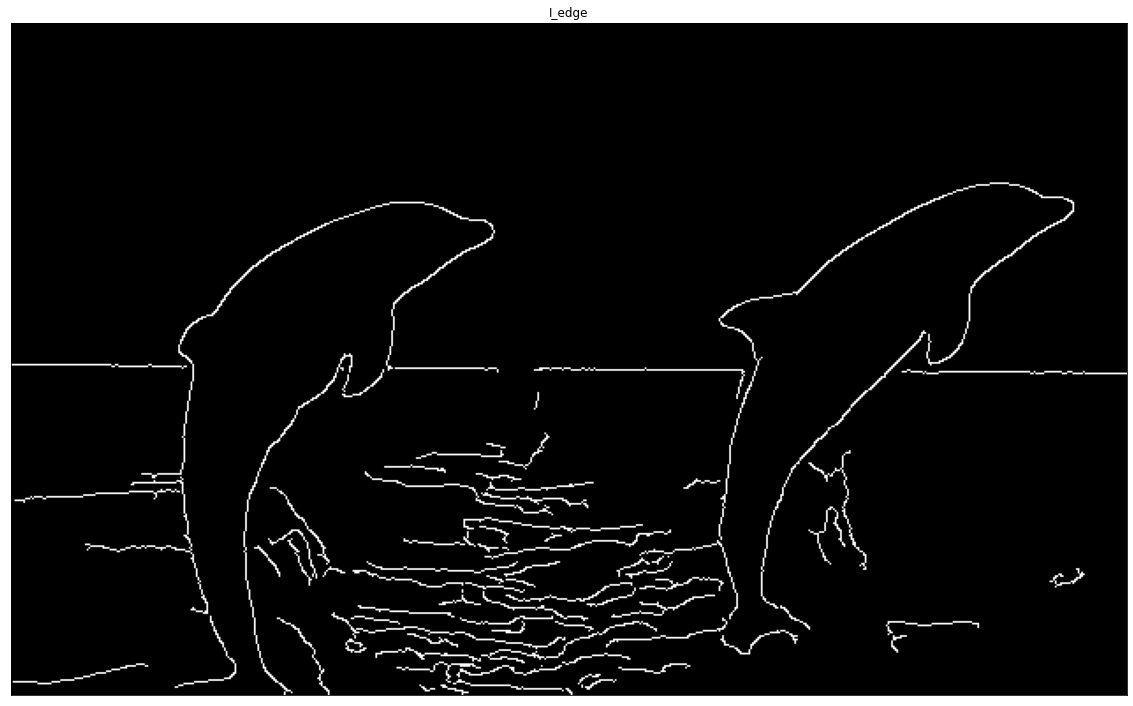

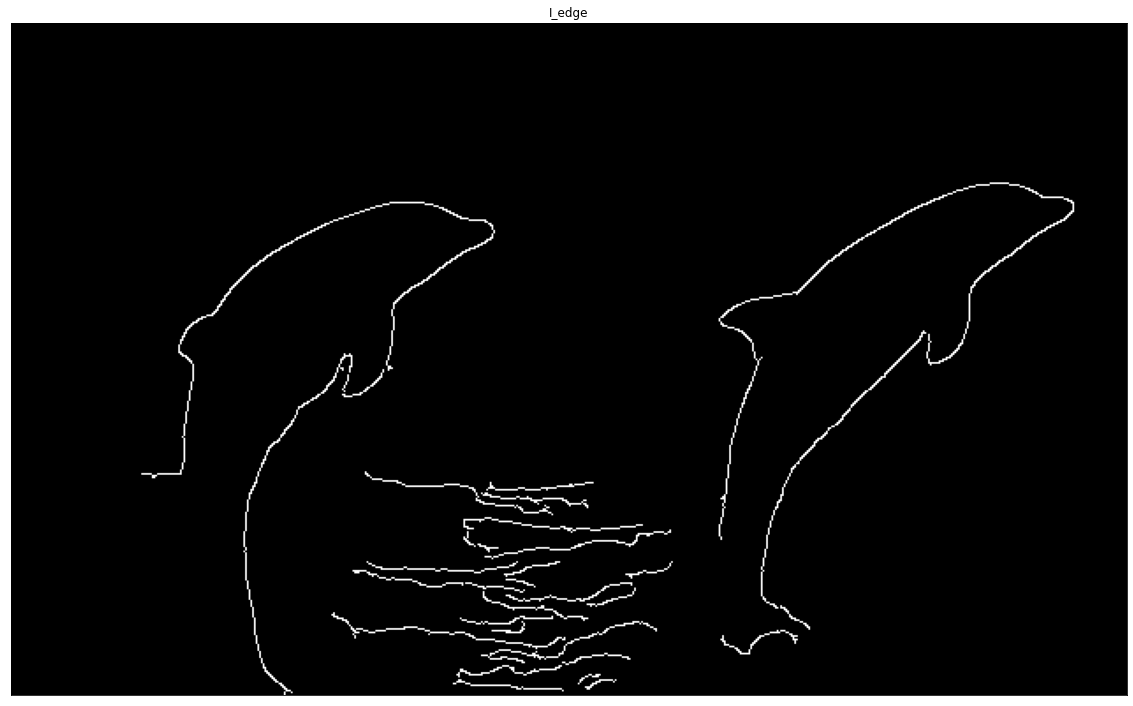

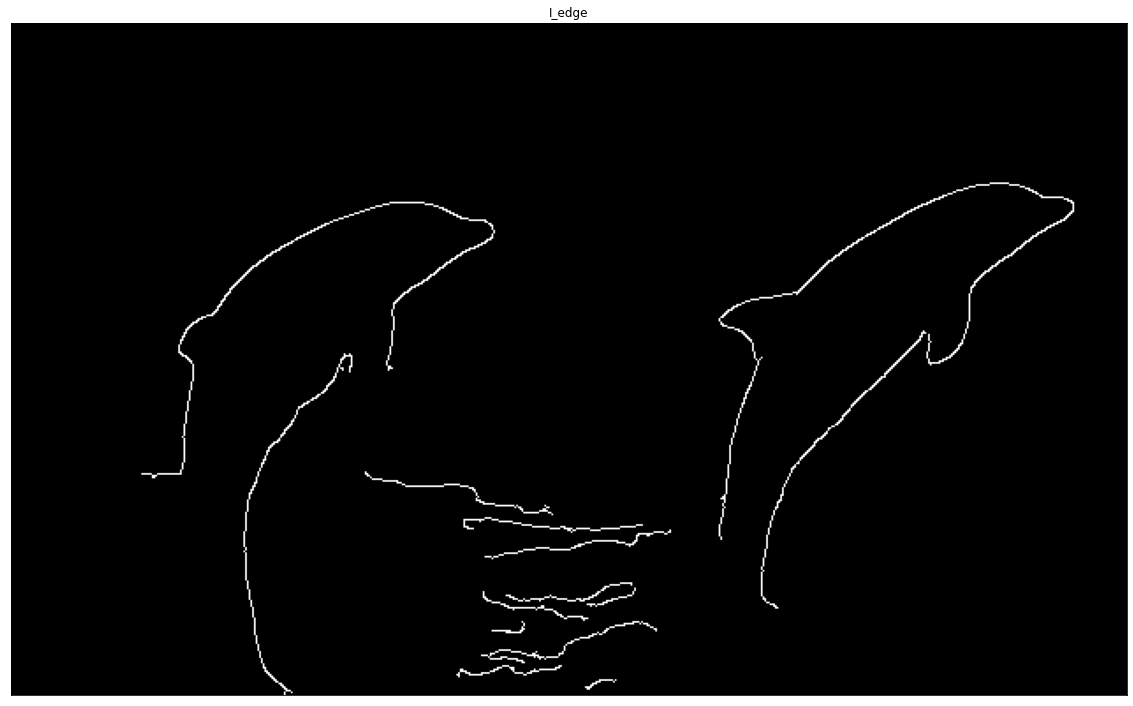

In [ ]:
canny('./dolphin.jpg', 13, 30, 100)
canny('./dolphin.jpg', 13, 30, 150)
canny('./dolphin.jpg', 13, 30, 200)

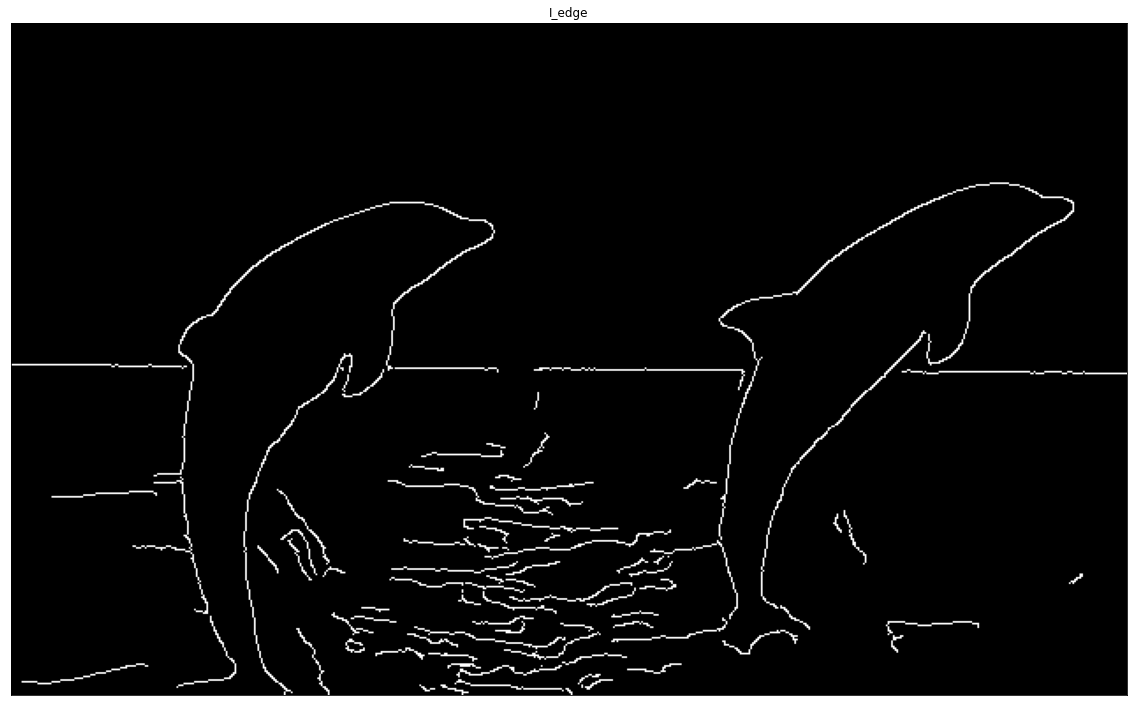

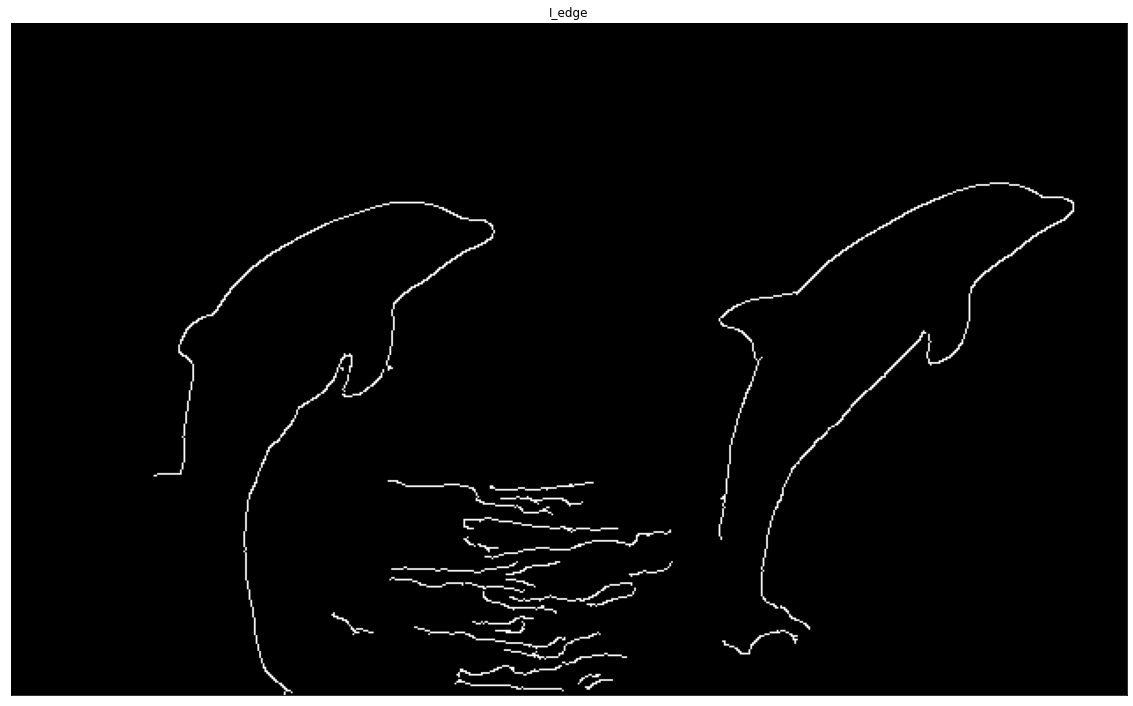

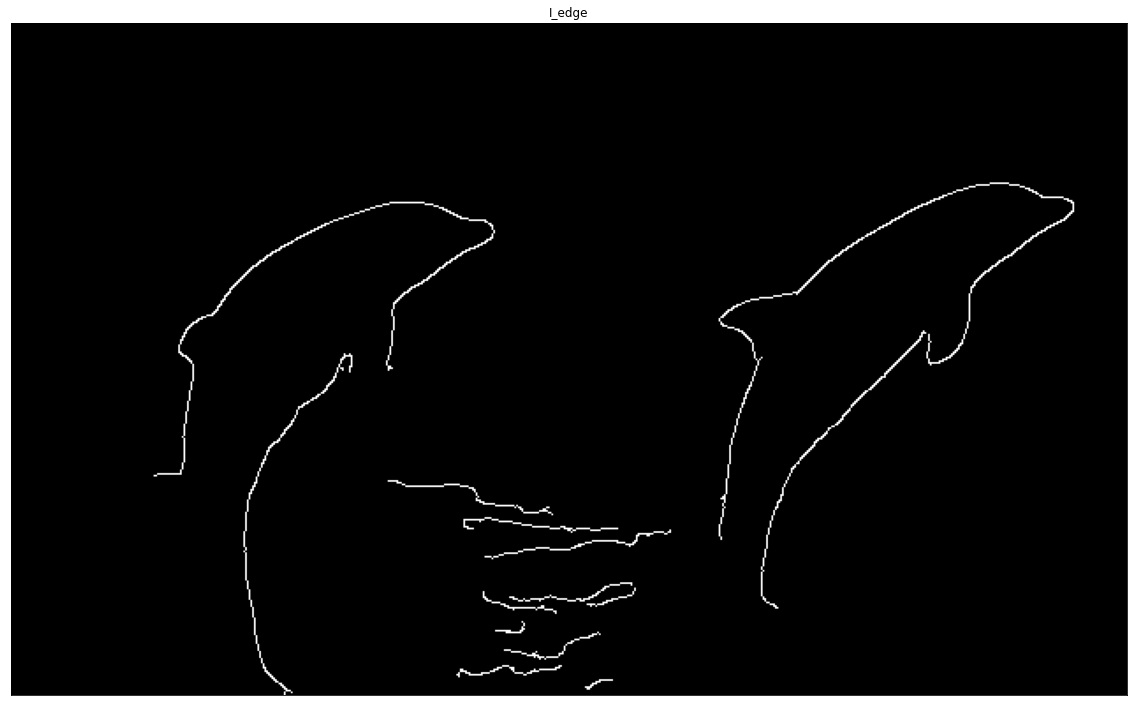

In [ ]:
canny('./dolphin.jpg', 13, 50, 100)
canny('./dolphin.jpg', 13, 50, 150)
canny('./dolphin.jpg', 13, 50, 200)

###4.3 Comment on effects of changing values

**Changes**

- K: With larger the K, there are less local edges detected. This is because it is the same as pre-process with gaussian then apply nabla operator to preprocessed image, and blurring erased some small local changes.

- L: With larger the L, there are less edges detected. This is because if L is higher, canny filter is less likely to continue to draw an edge.

- H and U: With larger H and U, there is less edge detected. This is becasue canny filter is less likely to start to draw an edge if H and U is larger. 
<br>

**Relationship between hyper parameters:** For the same detected edge to be retained, increasing K should reduce H/U and L at the same time, because increasing K makes magnitude of gradient becomes smaller, so the threshold for detecting valid edges also becomes smaller. To detect a specific edge, differencees between L and H,U should be reduced so that other edges can be avoided.

###4.4 Values to detect only dolphine edges

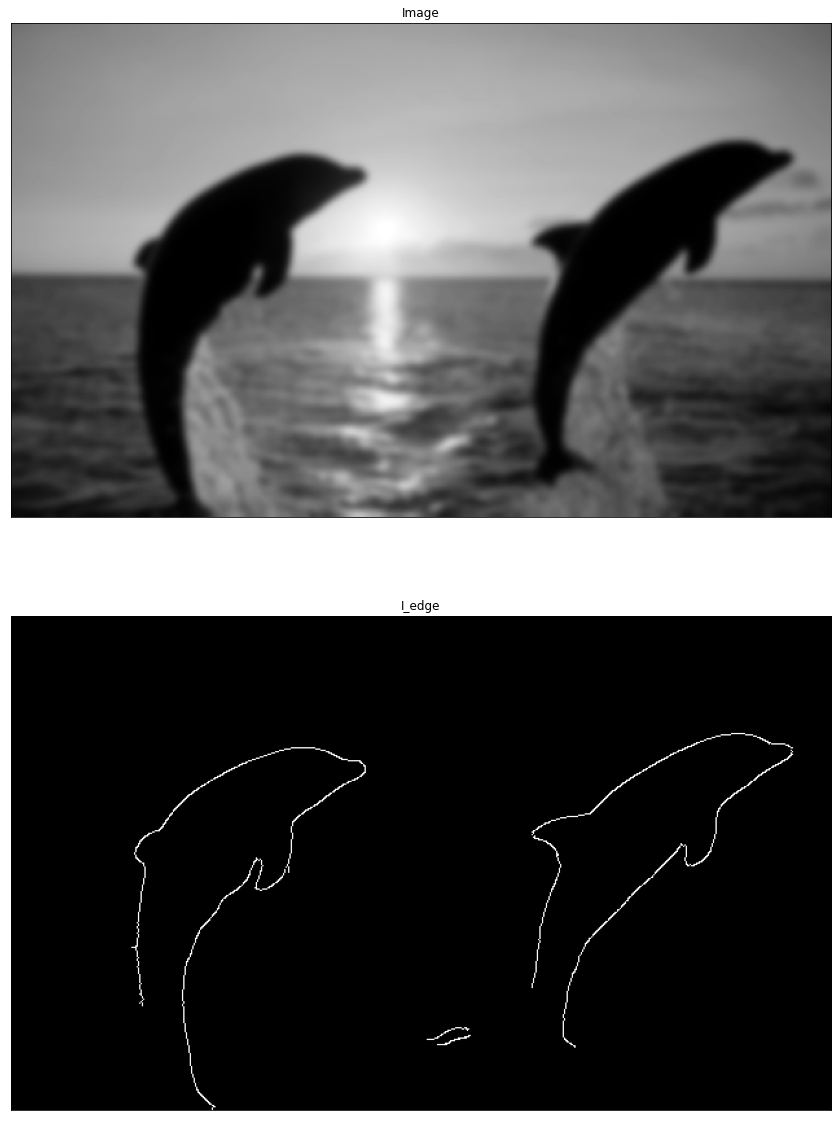

In [ ]:
canny('./dolphin.jpg', 17, 66, 177)

##5. Harris Corner Detection

In [122]:
# Perform non-maxima suppression
def non_max_suppression(img_mag, img_phs):
    
    M, N = img_mag.shape
    Z = np.zeros((M,N), dtype=np.int32)
    
    # convert img_phs (radian) into angle image
    img_angle = img_phs * 180. / np.pi
    img_angle[img_angle < 0] += 180

    
    for i in range(1,M-1): # Note that we are leaving 1 pixel gap on each side of image
        for j in range(1,N-1): # as for boundary pixels one of its neighbourhood pixel is not defined
            
            # store neighbourhood pixels in variables q and r
            q = 255
            r = 255

            #angle 0
            if (0 <= img_angle[i,j] < 22.5) or (157.5 <= img_angle[i,j] <= 180):
                q = img_mag[i, j+1]
                r = img_mag[i, j-1]
            #angle 45
            elif (22.5 <= img_angle[i,j] < 67.5):
                q = img_mag[i+1, j-1]
                r = img_mag[i-1, j+1]
            #angle 90
            elif (67.5 <= img_angle[i,j] < 112.5):
                q = img_mag[i+1, j]
                r = img_mag[i-1, j]
            #angle 135
            elif (112.5 <= img_angle[i,j] < 157.5):
                q = img_mag[i-1, j-1]
                r = img_mag[i+1, j+1]

            # if pixel magnitude is higher than both its neighbour than keep     
            if (img_mag[i,j] >= q) and (img_mag[i,j] >= r):
                Z[i,j] = img_mag[i,j]
            # otherwise make its value to 0
            else:
                Z[i,j] = 0
    
    return Z

In [121]:
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = cv2.filter2D(img, cv2.CV_64F, Kx)
    Iy = cv2.filter2D(img, cv2.CV_64F, Ky)
        
    # compute sobel Magnitude/Phase
    Im = cv2.magnitude(Ix, Iy)
    Im = Im / Im.max() * 255
    Ip = cv2.phase(Ix, Iy)    

    return (Im, Ip)

In [151]:
def harris(path, thres):

  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Compute Image derivatives
  I_x, I_y = np.gradient(image)
    
  # Compute Square of derivatives
  I_xx = I_x **2
  I_yy = I_y **2
  I_xy = I_x * I_y

  # Apply Gaussian Filtering
  I_xx_gaussian = cv2.GaussianBlur(I_xx, (5,5), math.sqrt(2))
  I_yy_gaussian = cv2.GaussianBlur(I_yy, (5,5), math.sqrt(2))
  I_xy_gaussian = cv2.GaussianBlur(I_xy, (5,5), math.sqrt(2))

  k = 0.05
  detA = I_xx_gaussian * I_yy_gaussian - I_xy_gaussian ** 2
  traceA = I_xx_gaussian + I_yy_gaussian
  cornerness_response = detA - k * traceA ** 2

  # Get Cornerness function
  img_mag, img_phs = sobel_filters(cornerness_response)

  #Perform non-maxima suppression
  result =  non_max_suppression(img_mag, img_phs)
    
  img_disp = cv2.imread(path)
    
  loc = np.where(result >= thres)

  # loop though points
  for pt in zip(*loc[::-1]):
    # draw filled circle on each point
    # cv2.circle(img, center, radius, color[, thickness[, lineType[, shift]]]) → None
    cv2.circle(img_disp, pt, 15, (255,0,0), -1)

  plt.subplot(121), plt.imshow(image, cmap="gray")
  plt.title("Original"), plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(img_disp, cmap="gray")
  plt.title("Harris image"), plt.xticks([]), plt.yticks([])


###5.1 Checkerboard image

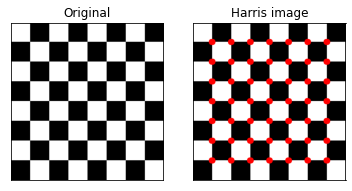

In [152]:
harris('./checkerboard.png', 20)


**Observe and report affect of changing threshold values**
- When threshold is less than 20, the edge detected is very blurry 
- When the thresholds are between 20 - 120, the all edges can be accuratly detected. 
- When threshold is larger than 120, some edges will be missing

###5.2 Shape image Figure

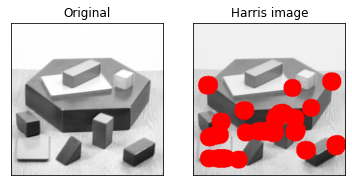

In [163]:
harris('./shapes.png', 50)

**Observation and report of Shape image**
- Smaller the threshold, more edges will be spotted but some of them are mis-detected
- Edges can be accurately detected when threshold is around 50.
- Few edges can be detected when threshold becomes larger but accuracy is detected edges increases

###5.3 Face image
<br>The image I choose is named face.png

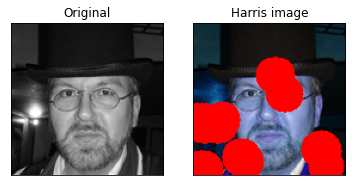

In [168]:
harris('./face.png', 60)

**Observe and report affect of Face image**
<br>
The rules we found in previous cases can also be applied here.
- Smaller the threshold, more edges will be spotted but some of them are mis-detected
- Few edges can be detected when threshold becomes larger but accuracy is detected edges increases